In [3]:
# importing pandas module 
import pandas as pd

In [4]:
# reading csv file from the same folder as this file's
data=pd.read_csv("yellow_tripdata_2018-01.csv")

In [5]:
# dropping null value columns to avoid errors - random guy recommendation
data.dropna(inplace = True) 

In [6]:
#FOR PICKUP date and time
# separating date and time of pickup
new = data["tpep_pickup_datetime"].str.split(" ", n = 1, expand = True)
data["pickup_date"]= new[0]
data["pickup_time"]= new[1]

# Dropping old tpep_pickup_datetime column
data.drop(columns =["tpep_pickup_datetime"], inplace = True) 

#spliting the pickup date into day, month and year
new = data["pickup_date"].str.split("-", n = 3, expand = True)
data["pickup_day"]= new[2]
data["pickup_month"]= new[1]
data["pickup_year"]= new[0]

# Dropping old pickup_date column
data.drop(columns =["pickup_date"], inplace = True)

In [7]:
#FOR DROPOFF date and time
# separating date and time of dropoff
new = data["tpep_dropoff_datetime"].str.split(" ", n = 1, expand = True)
data["dropoff_date"]= new[0]
data["dropoff_time"]= new[1]

# Dropping old tpep_dropoff_datetime column
data.drop(columns =["tpep_dropoff_datetime"], inplace = True) 

#spliting the dropoff date into day, month and year
new = data["dropoff_date"].str.split("-", n = 3, expand = True)
data["dropoff_day"]= new[2]
data["dropoff_month"]= new[1]
data["dropoff_year"]= new[0]

# Dropping old dropoff_date column
data.drop(columns =["dropoff_date"], inplace = True)



In [8]:
import numpy as np



In [9]:
#Getting the lat and long of the locations IDs
#Remember X=longitude and Y=latitude :)
lat_long=pd.read_csv("taxi_zones.csv")

#changing the name of the column LocationID to PULocationID
lat_longPU = lat_long.rename(columns = {"LocationID": "PULocationID"}) 

#Remember X=longitude and Y=latitude :)

#Merging 
data_lat_longPU = pd.merge(data, lat_longPU, on='PULocationID', how='left')
data_lat_longPU = data_lat_longPU.rename(columns = {"X": "PULongitude","Y":"PULatitude"}) 

display (data_lat_longPU)


,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,...,dropoff_day,dropoff_month,dropoff_year,PULongitude,PULatitude,OBJECTID,Shape_Leng,Shape_Area,zone,borough
0,1,1,0.50,1,N,41,24,2,4.5,0.5,...,01,01,2018,9.975206e+05,232274.162568,41.0,0.052793,0.000143,Central Harlem,Manhattan
1,1,1,2.70,1,N,239,140,2,14.0,0.5,...,01,01,2018,9.902668e+05,224949.075601,239.0,0.063626,0.000205,Upper West Side South,Manhattan
2,1,2,0.80,1,N,262,141,1,6.0,0.5,...,01,01,2018,9.992531e+05,222193.818758,262.0,0.049064,0.000122,Yorkville East,Manhattan
3,1,1,10.20,1,N,140,257,2,33.5,0.5,...,01,01,2018,9.968350e+05,218174.790003,140.0,0.047584,0.000114,Lenox Hill East,Manhattan
4,1,2,2.50,1,N,246,239,1,12.5,0.5,...,01,01,2018,9.829997e+05,213409.888398,246.0,0.069467,0.000281,West Chelsea/Hudson Yards,Manhattan
5,1,3,0.50,1,N,143,143,2,4.5,0.5,...,01,01,2018,9.875811e+05,221911.050507,143.0,0.054180,0.000151,Lincoln Square West,Manhattan
6,1,2,1.70,1,N,50,239,1,9.0,0.5,...,01,01,2018,9.859399e+05,218603.522675,50.0,0.055748,0.000173,Clinton West,Manhattan
7,1,1,0.70,1,N,239,238,1,4.0,0.5,...,01,01,2018,9.902668e+05,224949.075601,239.0,0.063626,0.000205,Upper West Side South,Manhattan
8,1,1,1.00,1,N,238,24,1,5.5,0.5,...,01,01,2018,9.917776e+05,227739.890845,238.0,0.060109,0.000185,Upper West Side North,Manhattan
9,1,1,0.70,1,N,170,170,2,5.5,0.5,...,01,01,2018,9.906390e+05,211668.106693,170.0,0.045769,0.000074,Murray Hill,Manhattan


In [10]:
#Filtering data_lat_longPU for Manhattan
# does borough equals to Manhattan?
# is_manhattan is a boolean variable with True or False in it
is_manhattan =  data_lat_longPU['borough']=="Manhattan"
# filter rows for borough Manhattan using  the boolean variable
data_lat_longPU_manhattan = data_lat_longPU[is_manhattan]



#adding column with 1
data_lat_longPU_manhattan.insert(0,"amount", 1)
data_lat_longPU_manhattan



#grouping the amounts 
data_lat_longPU_manhattan_zone = data_lat_longPU_manhattan.groupby(['zone'], as_index=False).agg({"amount":"sum","PULongitude":"mean","PULatitude":"mean"})


display (data_lat_longPU_manhattan_zone)





,zone,amount,PULongitude,PULatitude
0,Alphabet City,19656,9.906188e+05,203105.532318
1,Battery Park,2934,9.799550e+05,195212.321899
2,Battery Park City,75612,9.797811e+05,198536.380518
3,Bloomingdale,25356,9.937826e+05,231481.048878
4,Central Harlem,31737,9.975206e+05,232274.162568
5,Central Harlem North,13904,1.000990e+06,238412.229126
6,Central Park,122402,9.937844e+05,224349.916883
7,Chinatown,18041,9.847344e+05,199062.702717
8,Clinton East,270571,9.870599e+05,216980.297540
9,Clinton West,71983,9.859399e+05,218603.522675


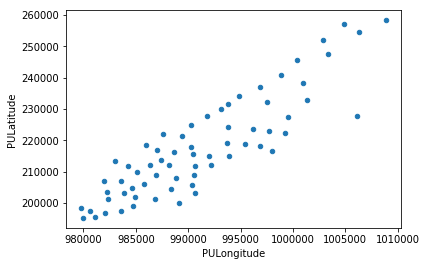

In [11]:
#scatter graph :)


import matplotlib

import matplotlib.pyplot as plt

data_lat_longPU_manhattan_zone.plot.scatter(x="PULongitude", y="PULatitude")
plt.show()

#different sizes according to the quantity of PU + map image


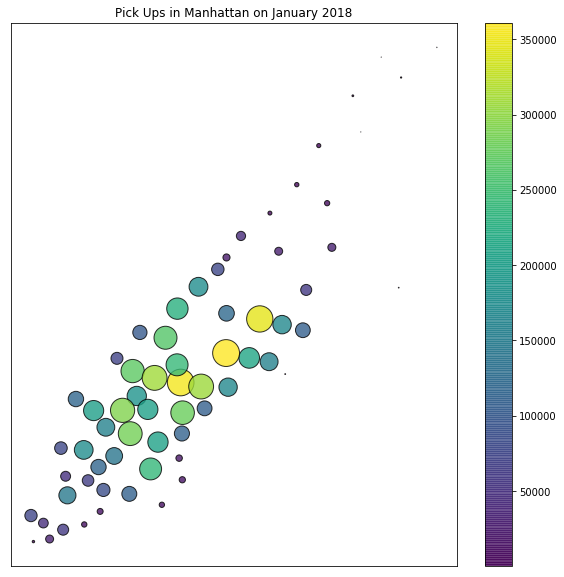

In [104]:
#map with 3 variables: long, lat, amount



oi = plt.scatter(x = data_lat_longPU_manhattan_zone['PULongitude'],
            y = data_lat_longPU_manhattan_zone['PULatitude'],label="Amount of Pick Ups",
            s = 0.002*data_lat_longPU_manhattan_zone['amount'],c=data_lat_longPU_manhattan_zone['amount'],alpha=0.8, edgecolors="black")


#im = plt.imread("taxi_zone_map_manhattan.jpg")
#implot = plt.imshow(im,)


plt.title('Pick Ups in Manhattan on January 2018')

plt.colorbar(oi)

plt.rcParams['figure.figsize']=(10,10)

#hiding the ticks 
plt.xticks([])
plt.yticks([])

plt.savefig('pick2.jpg')





